# Homework Assignment 4
## Mindy Tran
-------------------------
**Question 1:** In class we worked with a whole number of different tree building approaches. For this week's homework I'd like you to explore their difference on our geographically diverse set of SARS-CoV-2 genomes that I have aligned for you in `data/sc2_subset.align.fasta`. In particular I'd like you to do the following

1. Create a UPGMA tree from that data using biopython
2. Create a likelihood tree from that data using `RAxML` under the JC69 and HKY85 mutational models.
3. Compare and contrast results between these trees. Do you notice any systematic differences? Please write a few sentence on what differences you do or do not see.

**visual display tip--** I've created a _metadata_ file at `data/sc2_continents.csv` that has an assignment of each genome to broad geographic region. You could use that information to color branchs in the tree according to geography. For instance check out this [snippet of code](https://gist.github.com/andrewkern/3ff23e8f86b92de409c429230f40f926)

-------------------------

In [ ]:
# Good practice to put packages at the top

import os
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
from Bio import Phylo
from matplotlib import pyplot as plt

**1. Create a UPGMA tree from that data using biopython**

In [5]:
# color the leaf nodes of our phylogenetic tree by geographical region

x = pd.read_csv("data/sc2_continents.csv",header=None)
cDict = {}
# loop through rows in a pandas dataframe
for index, row in x.iterrows():
    cDict[row[0]] = row[1]

colors = {
    'EUR':"red",
    'EAS' : "blue",
    'AFR' : "yellow",
    'SAM' : "green",
    'NAM' : "orange",
    "AUS" : "purple",
    'SAS' : "cyan"
}

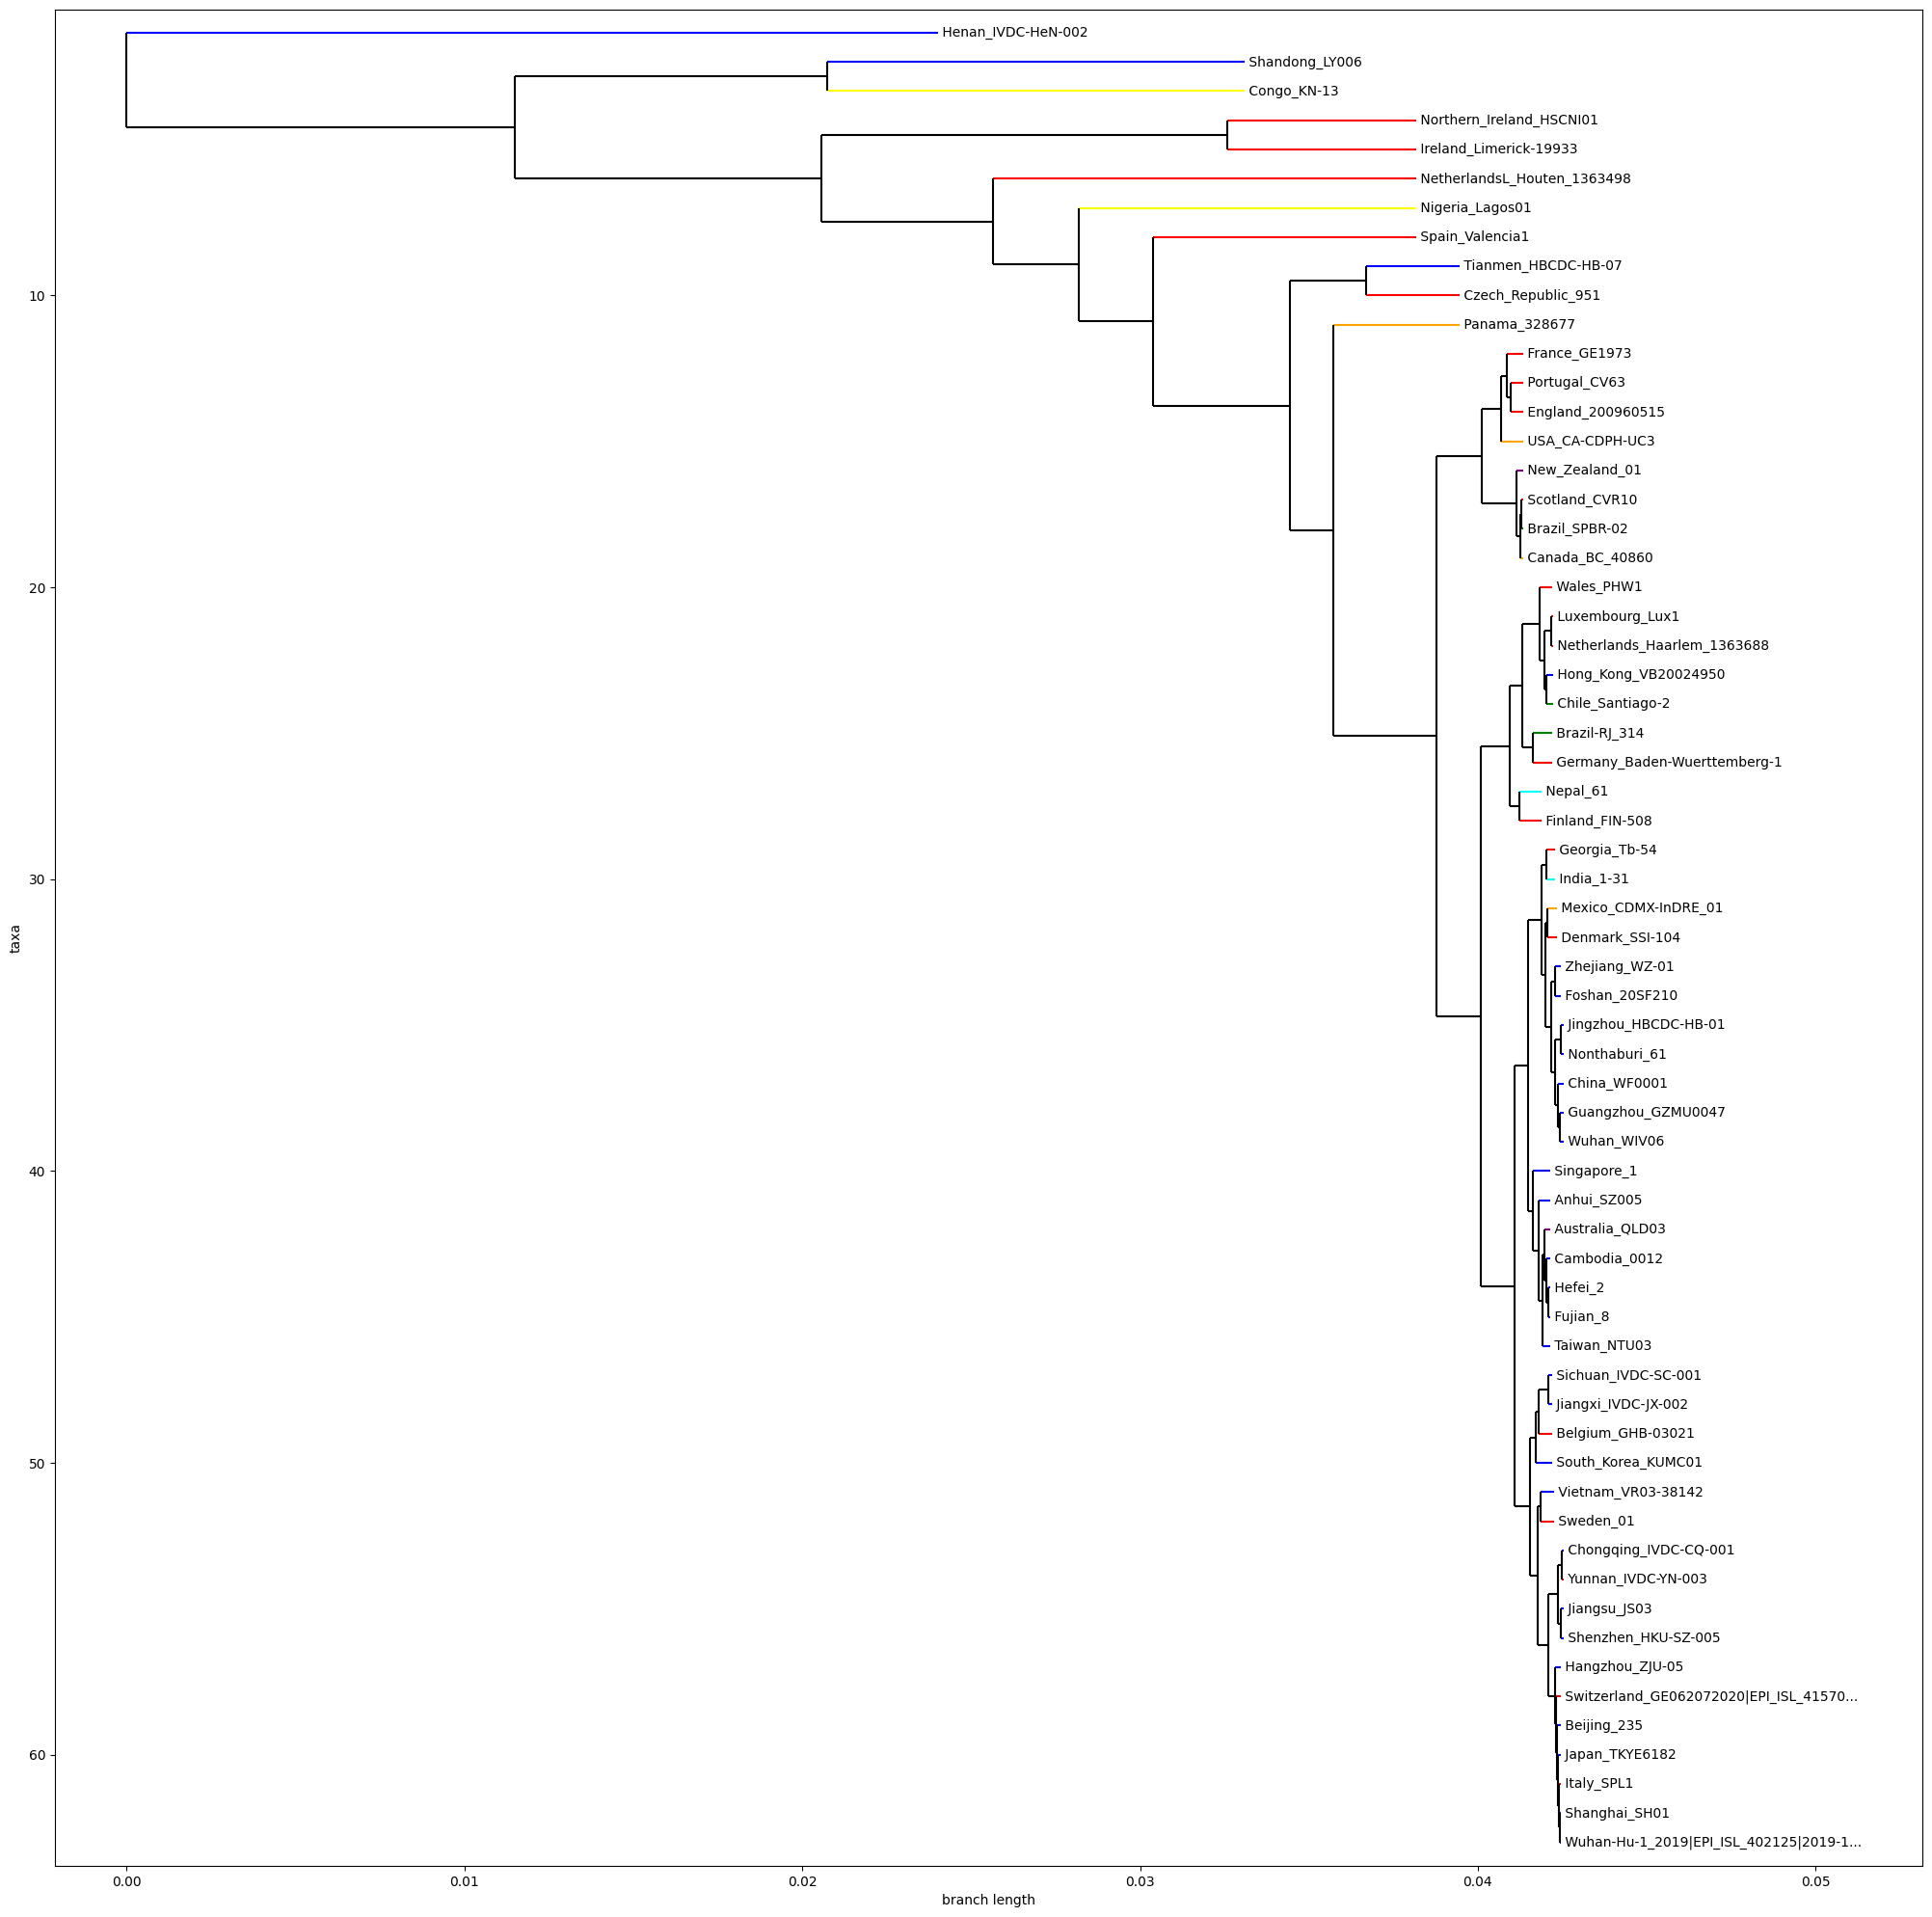

In [10]:
lyso = AlignIO.read("data/sc2_subset.align.fasta","fasta")
fig, ax = plt.subplots(figsize=[25,25]) 

calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(lyso)
#hate the internal name labels
for n in tree.get_nonterminals():
    n.name=""

for f in tree.get_terminals():
    # color leaf nodes by geo-location
    f.color=colors[cDict[f.name]]
    
Phylo.draw(tree,axes=ax)

-------------------------
**2. Create a likelihood tree from that data using `RAxML` under the JC69 and HKY85 mutational models.**

In [12]:
#a function to get likelihood results
def get_lik(file):
    # get likelihood
    with open(file, "r") as f:
        for line in f:
            tok = line.split()
            if len(tok) > 0 and tok[0] == 'Final':
                lik = float(tok[-1])
    return(lik)

likelihood of model JC69: -43057.731803


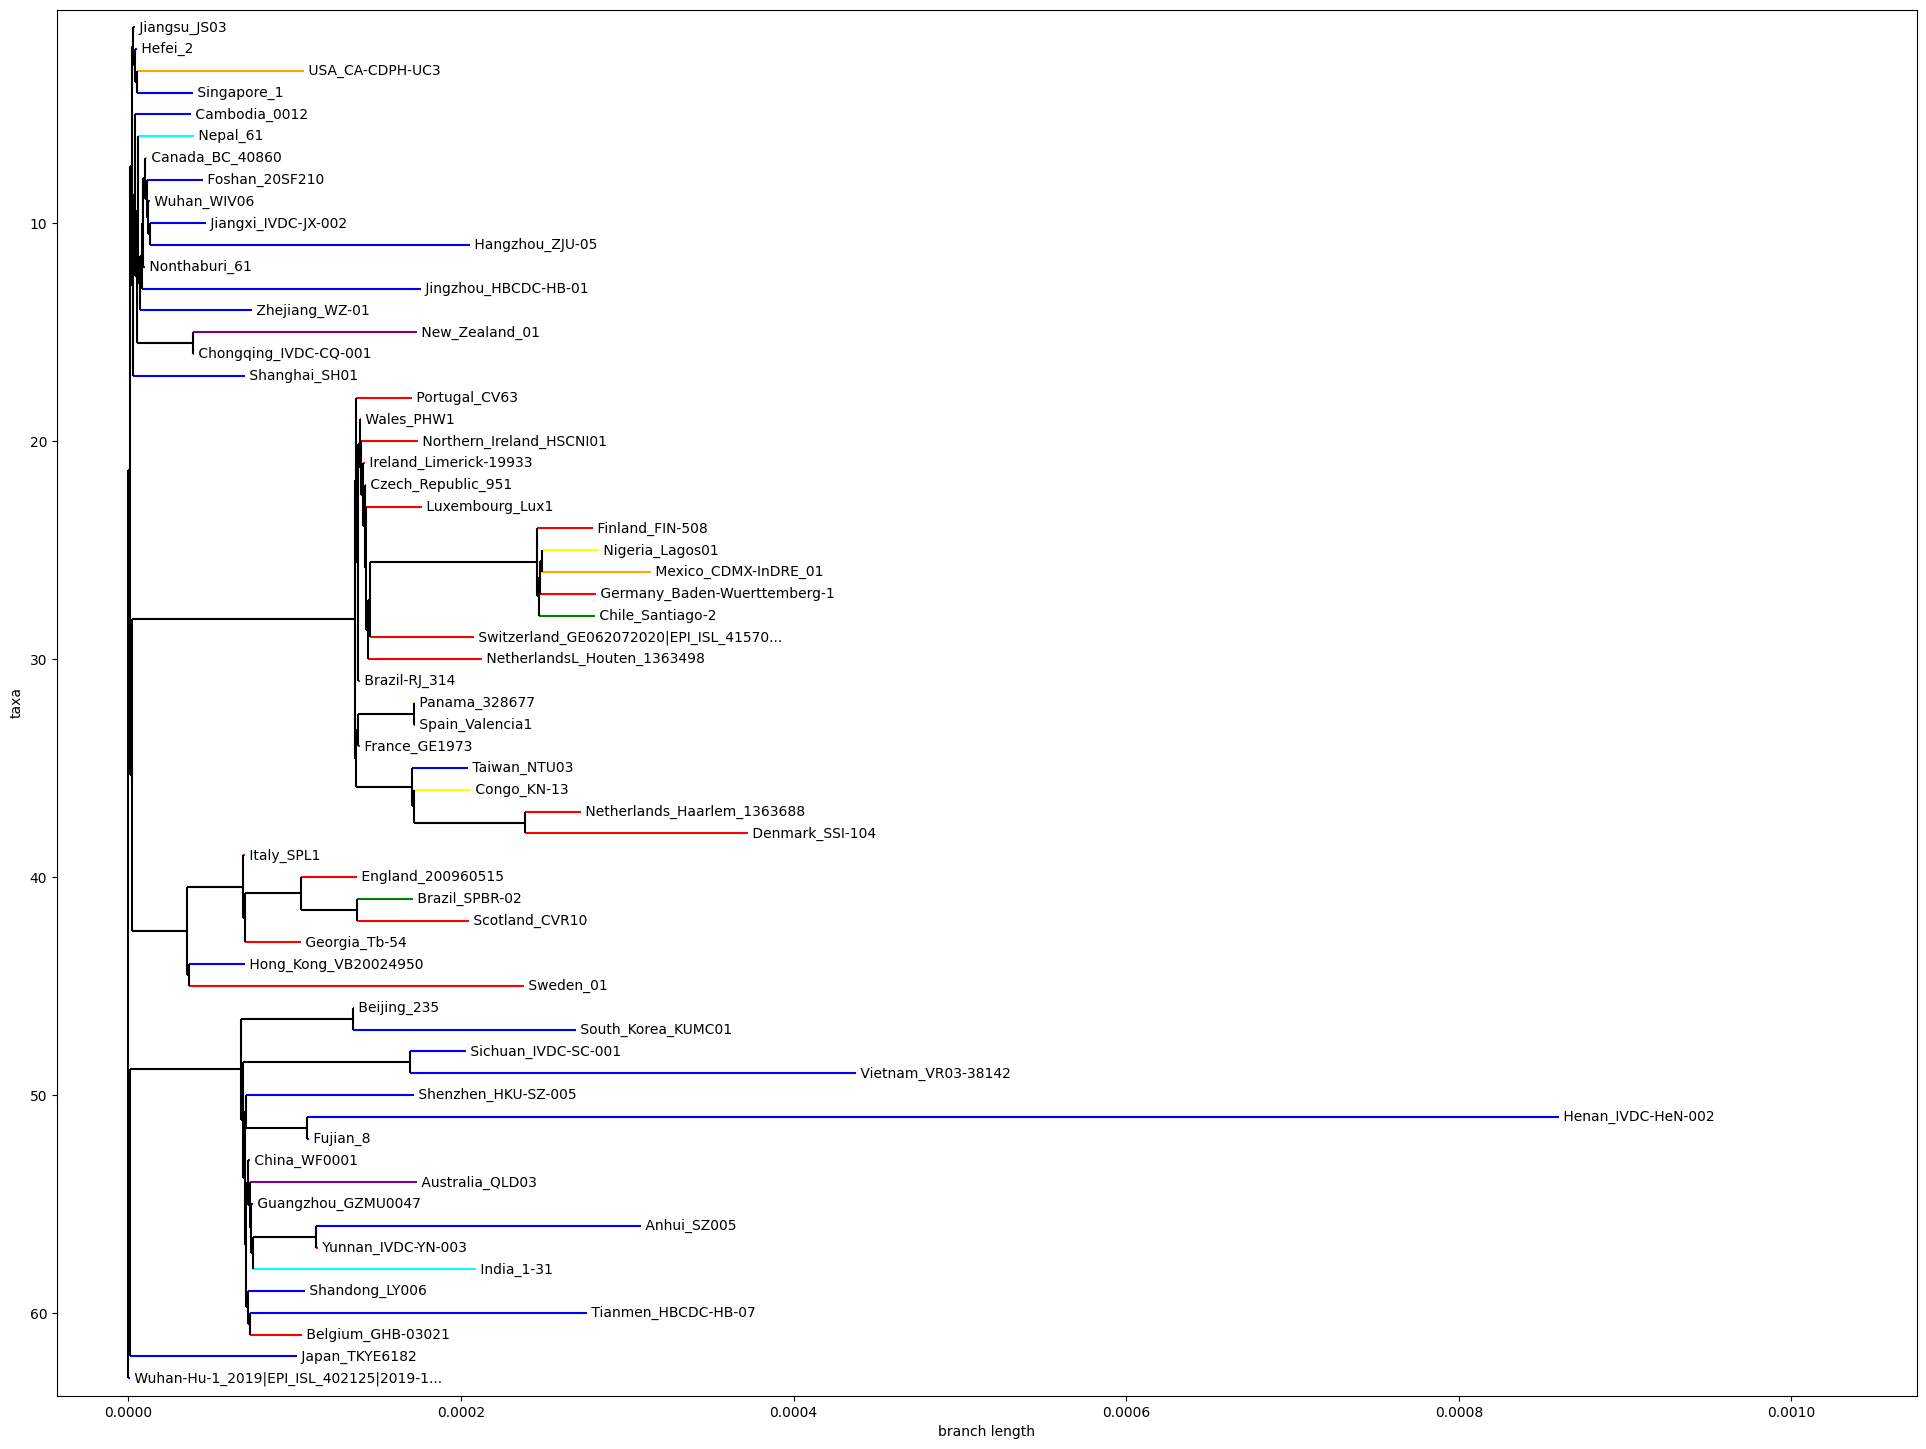

In [17]:
## JC69
#define the command line to run
raxml_cline = "raxmlHPC -m GTRCAT -n out -p 10000 --silent --JC69 -s data/sc2_subset.align.fasta > /dev/null"

# clean out previous results
if os.path.exists("RAxML_info.out"):
    [os.remove(x) for x in os.listdir(".") if 'RAxML' in x]  


# now run raxml using os.system
os.system(raxml_cline)

JC69_tree = Phylo.read("RAxML_bestTree.out", "newick")
for f in JC69_tree.get_terminals():
    # color leaf nodes by geo-location
    f.color=colors[cDict[f.name]]

lik = get_lik("RAxML_info.out")
print(f"likelihood of model JC69: {lik}")

# Phylo.draw(best_tree,axes=ax)
fig,ax = plt.subplots(figsize=[24,18])
Phylo.draw(JC69_tree,axes=ax)

likelihood of model HKY85: -42112.246428


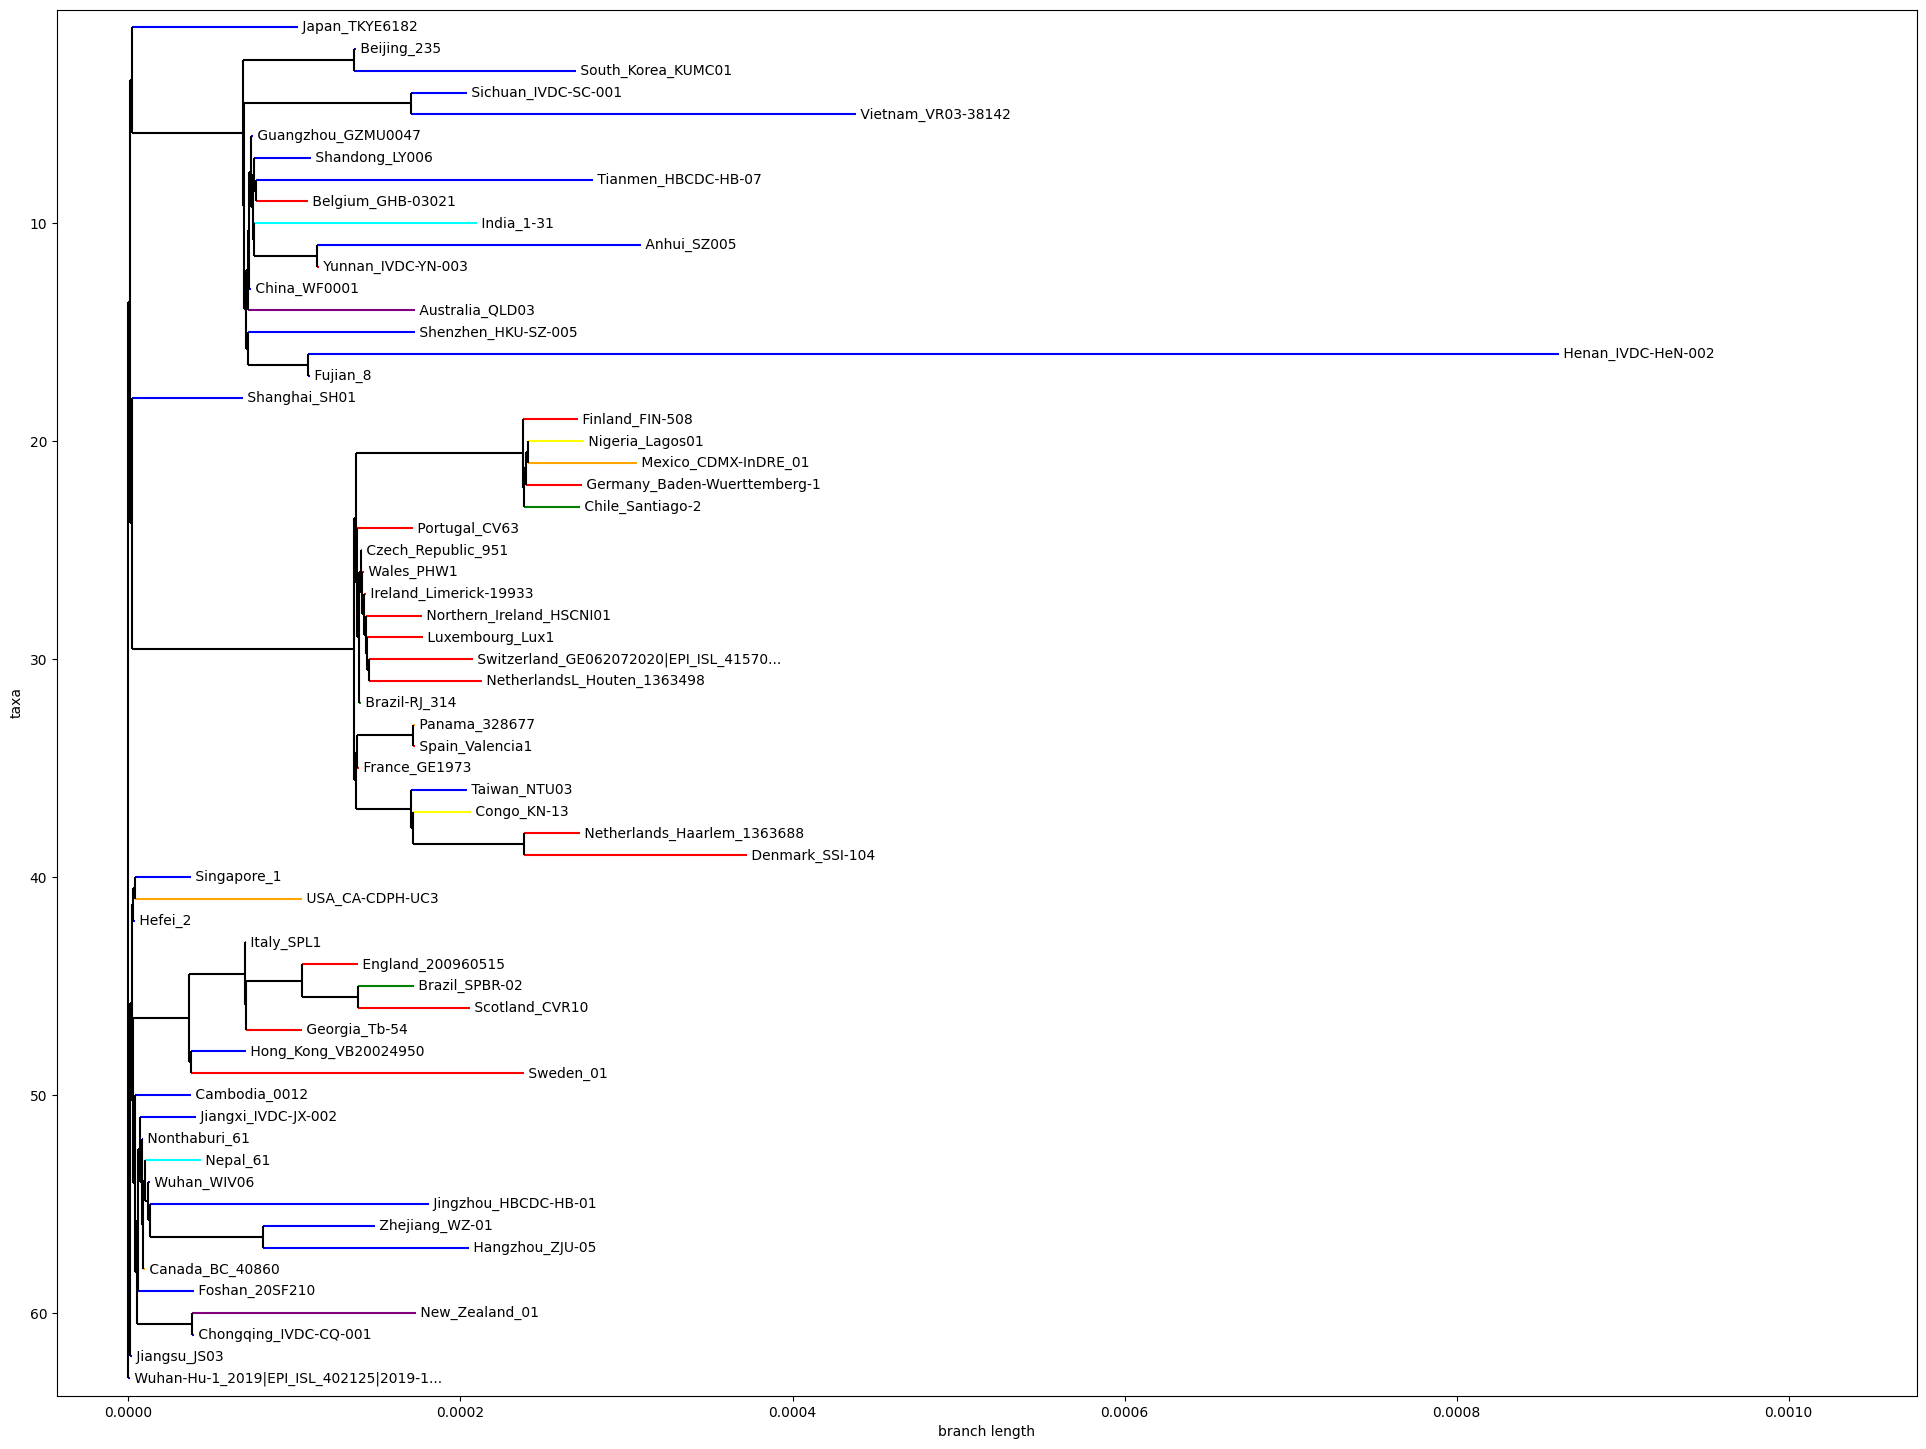

In [18]:
## HKY85
#define the command line to run
raxml_cline = "raxmlHPC -m GTRCAT -n out -p 10000 --silent --HKY85 -s data/sc2_subset.align.fasta > /dev/null"

# clean out previous results
if os.path.exists("RAxML_info.out"):
    [os.remove(x) for x in os.listdir(".") if 'RAxML' in x]  


# now run raxml using os.system
os.system(raxml_cline)

HKY85_tree = Phylo.read("RAxML_bestTree.out", "newick")
for f in HKY85_tree.get_terminals():
    # color leaf nodes by geo-location
    f.color=colors[cDict[f.name]]

lik = get_lik("RAxML_info.out")
print(f"likelihood of model HKY85: {lik}")

# Phylo.draw(best_tree,axes=ax)
fig,ax = plt.subplots(figsize=[24,18])
Phylo.draw(HKY85_tree,axes=ax)

----------------------
**3. Compare and contrast results between these trees. Do you notice any systematic differences? Please write a few sentence on what differences you do or do not see.**

Knowing that East Asia (EAS) is coded as the blue nodes and North America (NAM) is coded as the orange nodes, we can see a large difference in the locations of the EAS and NAM strains for the JC69 and HKY85 mutational models. Many of the EAS strains are located near the top and bottom of the JC69 and HKY85 mutational models (but with switched clades). The JC69 and HKY85 mutational models almost seem like mirrors of each other since even the clades in the middle are switched between the two models. Since both models are very similar but still different, it provides support for the hypothesis that geographic location and SARS-CoV-2 genomes are related. 